## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [29]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sat Nov 30 22:35:39 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 441.12       Driver Version: 441.12       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   52C    P8    13W / 210W |   7221MiB /  8192MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [30]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [31]:
train, test = keras.datasets.cifar10.load_data()

In [32]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2 * ((x-x.min()) / (x.max()-x.min())) - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [33]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [35]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [36]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [37]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [38]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.7245 - acc: 0.3890 - val_loss: 1.5582 - val_acc: 0.4398
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.4906 - acc: 0.4725 - val_loss: 1.4401 - val_acc: 0.4907
Epoch 3/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.3645 - acc: 0.5166 - val_loss: 1.4039 - val_acc: 0.5006
Epoch 4/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.2678 - acc: 0.5543 - val_loss: 1.3846 - val_acc: 0.5152
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.1867 - acc: 0.5828 - val_loss: 1.3648 - val_acc: 0.5268
Epoch 6/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.1126 - acc: 0.6085 - val_loss: 1.3760 - val_acc: 0.5250
Epoch 7/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.0355 - acc: 0.6353 - val_loss: 1.3733 - 

50000/50000 [==============================] - 2s 42us/step - loss: 0.1163 - acc: 0.9618 - val_loss: 3.6889 - val_acc: 0.5242
Epoch 60/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.0972 - acc: 0.9674 - val_loss: 3.7818 - val_acc: 0.5275
Epoch 61/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.0899 - acc: 0.9695 - val_loss: 3.8812 - val_acc: 0.5150
Epoch 62/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.0976 - acc: 0.9684 - val_loss: 3.6773 - val_acc: 0.5268
Epoch 63/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.0887 - acc: 0.9699 - val_loss: 3.8453 - val_acc: 0.5229
Epoch 64/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.0929 - acc: 0.9699 - val_loss: 3.7159 - val_acc: 0.5255
Epoch 65/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.0917 - acc: 0.9696 - val_loss: 3.7659 - val_acc: 0.5252
Epoch 66/100
50000/50000 [==============

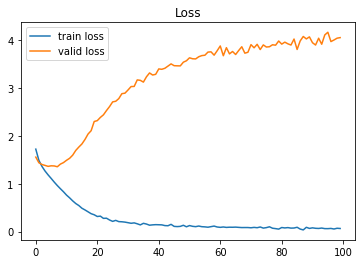

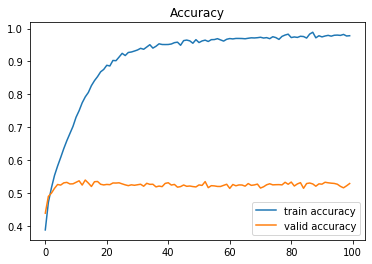

In [39]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()